In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

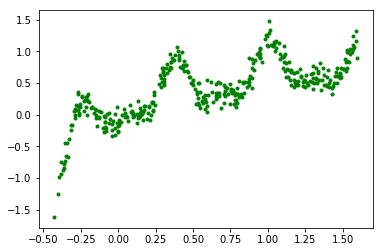

In [4]:
%matplotlib inline
x = np.linspace(0,2,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = torch.FloatTensor(x.reshape(-1,1))
yy = torch.FloatTensor(y.reshape(-1,1))
plt.scatter(x, y, marker='.', color='g')

In [12]:
## defining the model
class ProbRegression(nn.Module):
    
    def __init__(self, n_hidden=2):
        super().__init__()
        self.fcp1 = nn.Linear(1, n_hidden)
        self.fcr1 = nn.Linear(1, n_hidden)
#         self.fcr2 = nn.Linear(n_hidden, 1)
        self.actf = nn.Tanh()
#         self.actf = nn.Sigmoid()
#         self.actf = lambda x:torch.exp(- x**2) #* 0.3989422804014327# normal distribution
    
        
    def forward(self,x):
        p = self.fcp1(x)
        p = self.actf(p)
        ## this is not differentiable; divides the space like relu does
#         p = (p > 0).type(torch.FloatTensor)
        r = self.fcr1(x)

        ########## Use any of the following methods###########

        ## method 1 ##
        ## Must use tanh activation for variation of input in +ve, -ve domain
#         out = (p).sum(dim=1).reshape(-1,1)
        
        ## method 2 ##
        out = (p*r).sum(dim=1).reshape(-1,1)
        
        ## method 3 ##
#         out = self.fcr2(p*r)
    
        return out
    
model = ProbRegression(n_hidden=10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=1)
criterion = nn.MSELoss()

In [13]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

EPOCHS = 100000
for step in range(EPOCHS):

    yout = model(xx)
#     print(yout)
    loss = criterion(yout, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss.data)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, yout.data.numpy().reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss tensor(1.5218)

_______________________
epoch 100
Loss tensor(0.0852)

_______________________
epoch 200
Loss tensor(0.0844)

_______________________
epoch 300
Loss tensor(0.0837)

_______________________
epoch 400
Loss tensor(0.0832)

_______________________
epoch 500
Loss tensor(0.0828)

_______________________
epoch 600
Loss tensor(0.0825)

_______________________
epoch 700
Loss tensor(0.0824)

_______________________
epoch 800
Loss tensor(0.0822)

_______________________
epoch 900
Loss tensor(0.0822)

_______________________
epoch 1000
Loss tensor(0.0821)

_______________________
epoch 1100
Loss tensor(0.0821)

_______________________
epoch 1200
Loss tensor(0.0820)

_______________________
epoch 1300
Loss tensor(0.0820)

_______________________
epoch 1400
Loss tensor(0.0819)

_______________________
epoch 1500
Loss tensor(0.0819)

_______________________
epoch 1600
Loss tensor(0.0818)

_______________________
epoch 1700
Loss tensor(0.0818)

____

TclError: invalid command name "pyimage84"

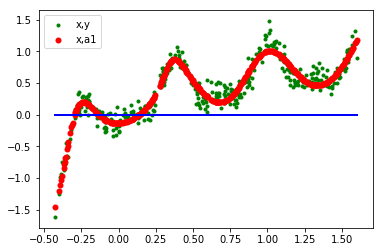

In [14]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.data.numpy().reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.legend()

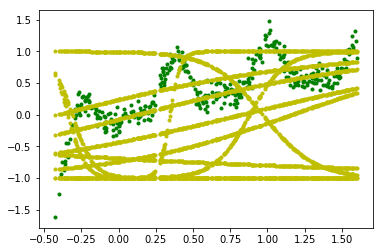

In [15]:
p = model.fcp1(xx)
p = model.actf(p)
r = model.fcr1(xx)
out = (p*r).sum(dim=1).reshape(-1,1)

plt.scatter(x, y, marker='.', c='g', label='x,y')
for prb in p.data.numpy().T:
    plt.scatter(x, prb, marker='.', c='y', label='x,prob')

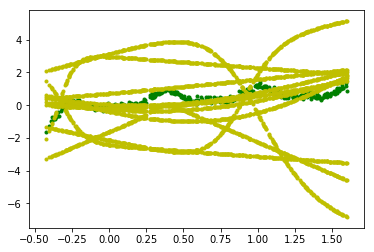

In [17]:
pr = (p*r)
plt.scatter(x, y, marker='.', c='g', label='x,y')
for prs in pr.data.numpy().T:
    plt.scatter(x, prs, marker='.', c='y', label='x,prob')

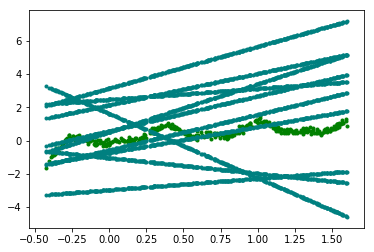

In [16]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
for reg in r.data.numpy().T:
    plt.scatter(x, reg, marker='.', c='teal', label='x,regr')